In [42]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load Spotify song data into a DataFrame
df = pd.read_csv('spotify_songs.csv')

In [ ]:
df.head(5)

In [8]:
genres = df['final genre'].str.get_dummies(sep=',')

In [ ]:
genres

In [10]:
# Select the numerical features to use for clustering
features = ['tempo', 'energy', 'valence','popularity','danceability','instrumentalness', 'acousticness']



In [12]:
df_features = df[features]

In [ ]:
df_features = pd.concat([df_features, genres], axis=1)

In [14]:
df_features

,tempo,energy,valence,popularity,danceability,instrumentalness,acousticness
0,98.030,0.6420,0.685,34,0.581,0.020000,0.0393
1,84.130,0.4660,0.359,0,0.539,0.000008,0.5910
2,91.993,0.8270,0.770,14,0.877,0.000000,0.4990
3,130.016,0.5650,0.642,56,0.805,0.000002,0.6230
4,107.988,0.4860,0.373,26,0.670,0.000363,0.3250
...,...,...,...,...,...,...,...
5004,191.259,0.1570,0.266,47,0.319,0.849000,0.9870
5005,93.336,0.3500,0.620,47,0.465,0.279000,0.4100
5006,104.691,0.0772,0.360,47,0.618,0.919000,0.9750
5007,78.922,0.3360,0.418,47,0.414,0.921000,0.8730


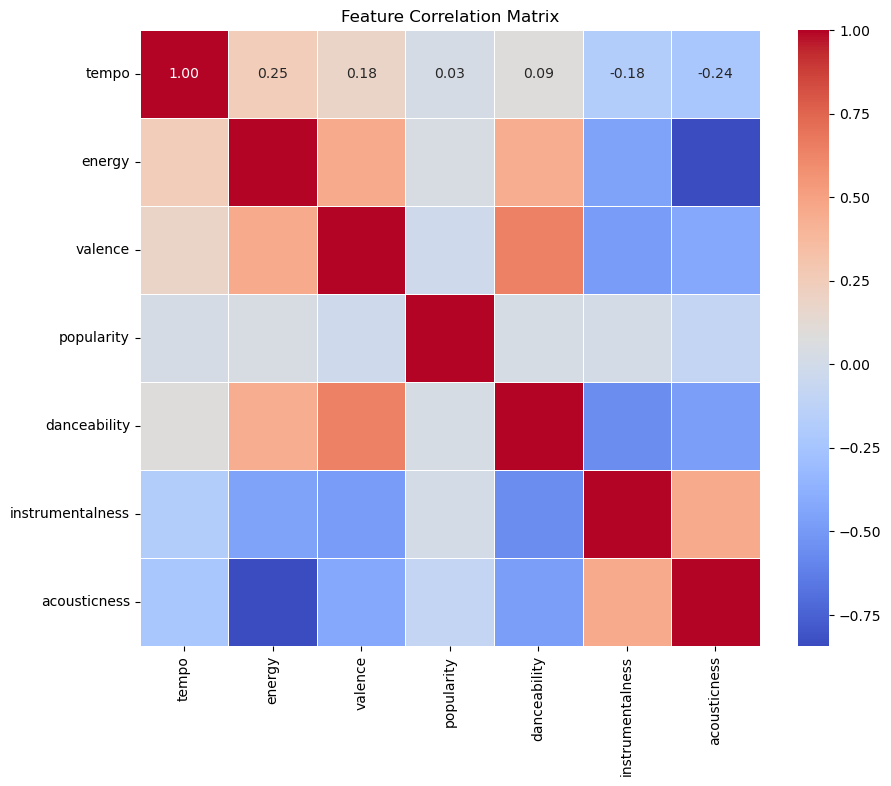

In [16]:

# Calculate the correlation matrix
correlation_matrix = df_features.corr()

# Plot the correlation matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Danceability and valence are highly correlated - I will remove valence. Popularity can also skew results as there is no relation between the songs just because they are both equally popular. Also energy and accousticness are highly correlated.

In [ ]:
df_features = df_features.drop(columns=['popularity', 'valence','acousticness','Other'])

In [44]:
# Standardize the feature values
scaler = MinMaxScaler()
X = scaler.fit_transform(df_features)



In [46]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

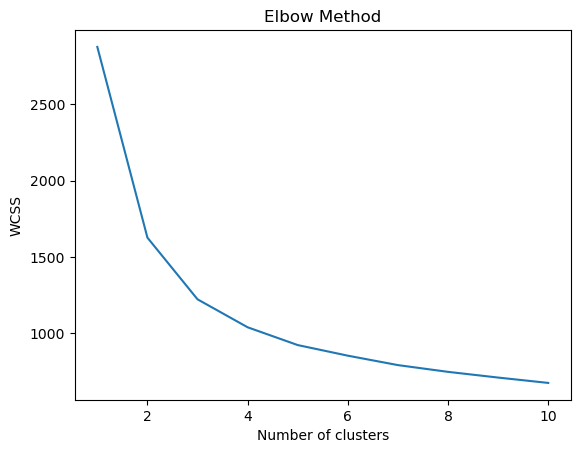

In [47]:
# Plot the elbow curve to find the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [74]:
# Perform K-means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


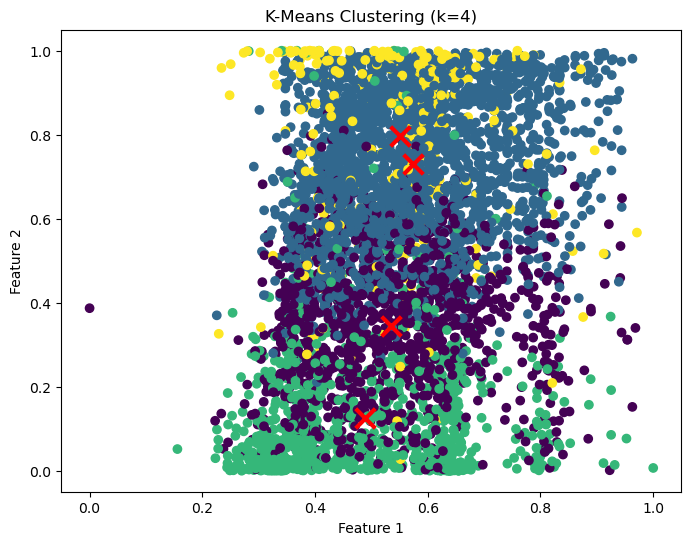

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.title(f'K-Means Clustering (k={num_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [78]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



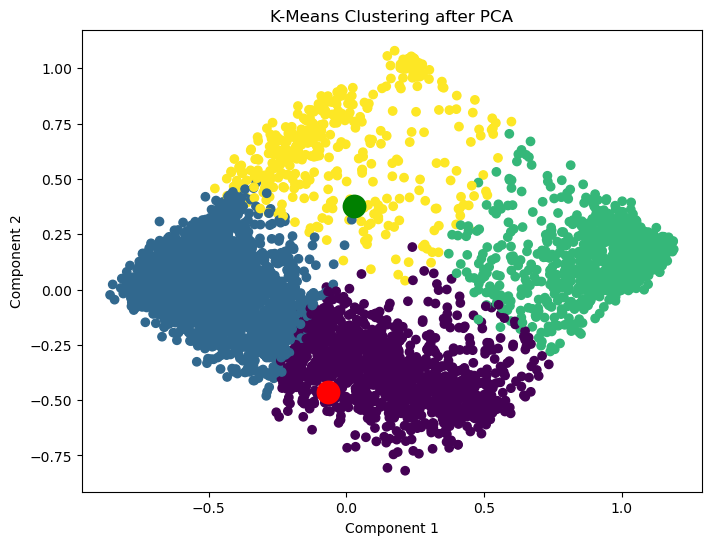

In [80]:
# Visualize the PCA-transformed clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(pca.components_[0, 0], pca.components_[0, 1], s=200, linewidths=3, color='red')
plt.scatter(pca.components_[1, 0], pca.components_[1, 1], s=200, linewidths=3, color='green')
plt.title(f'K-Means Clustering after PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [82]:
# Add the cluster labels back to the Dataframe
df['cluster'] = labels

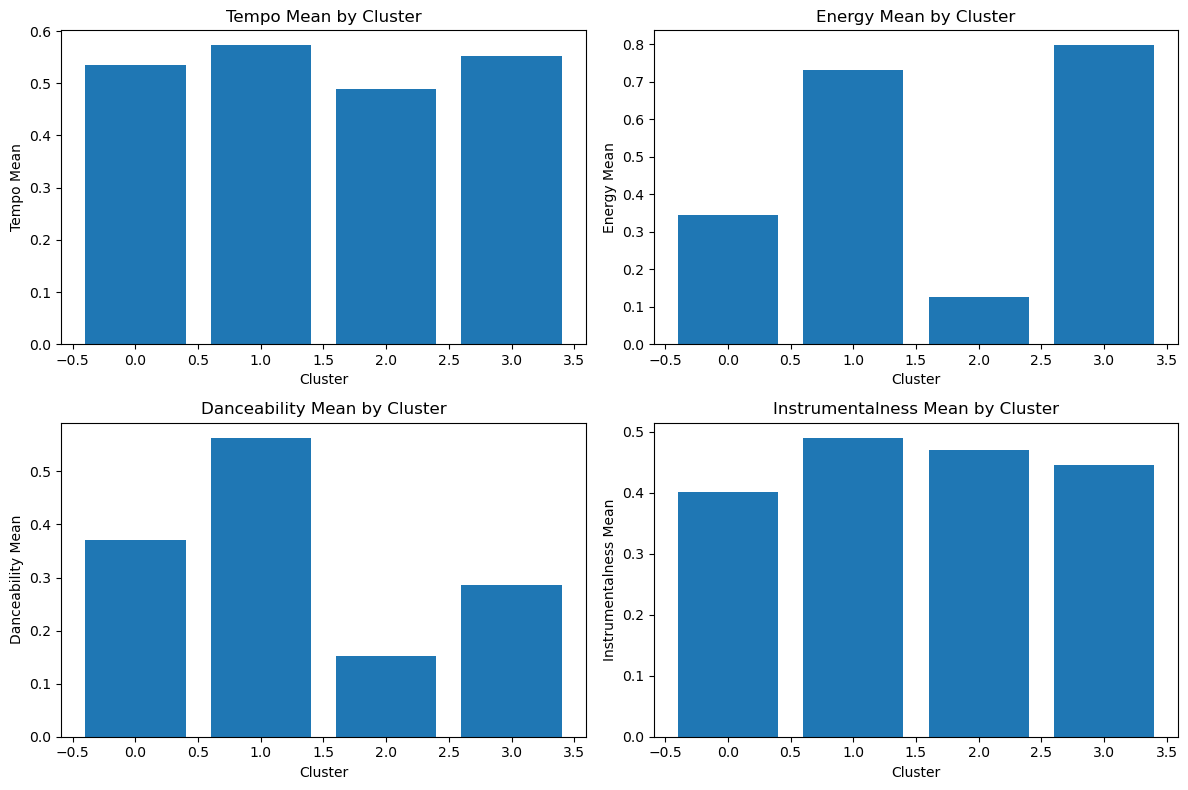

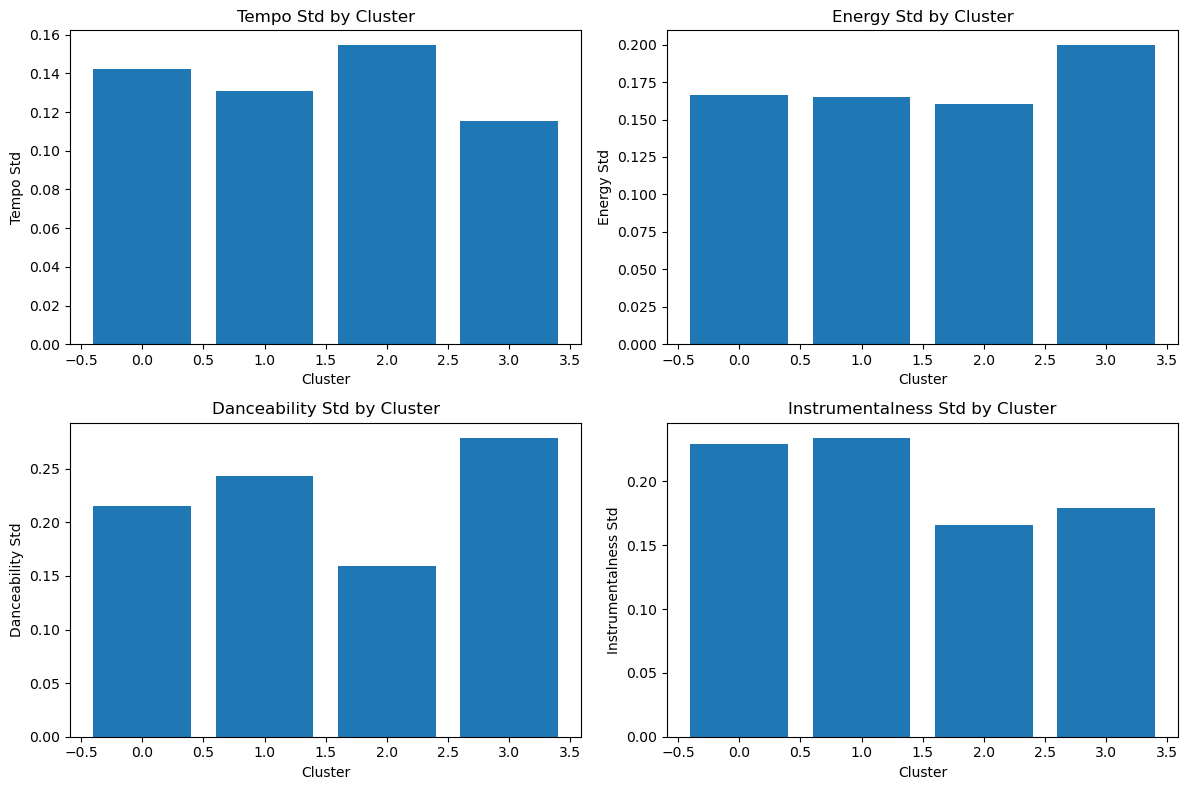

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the mean and standard deviation of each feature for each cluster
cluster_stats = []
for cluster_id in range(num_clusters):
    cluster_data = X[labels == cluster_id]
    cluster_mean = cluster_data.mean(axis=0)
    cluster_std = cluster_data.std(axis=0)
    cluster_stats.append({
        'Cluster': cluster_id,
        'Tempo Mean': cluster_mean[0], 
        'Tempo Std': cluster_std[0],
        'Energy Mean': cluster_mean[1],
        'Energy Std': cluster_std[1],
        'Danceability Mean': cluster_mean[2],
        'Danceability Std': cluster_std[2],
        'Instrumentalness Mean': cluster_mean[3],
        'Instrumentalness Std': cluster_std[3]
    })

# Visualize the cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = ['Tempo', 'Energy', 'Danceability', 'Instrumentalness']
for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    ax.bar(range(num_clusters), [stats[f"{feature} Mean"] for stats in cluster_stats])
    ax.set_title(f"{feature} Mean by Cluster")
    ax.set_xlabel('Cluster')
    ax.set_ylabel(f"{feature} Mean")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    ax.bar(range(num_clusters), [stats[f"{feature} Std"] for stats in cluster_stats])
    ax.set_title(f"{feature} Std by Cluster")
    ax.set_xlabel('Cluster')
    ax.set_ylabel(f"{feature} Std")

plt.tight_layout()
plt.show()

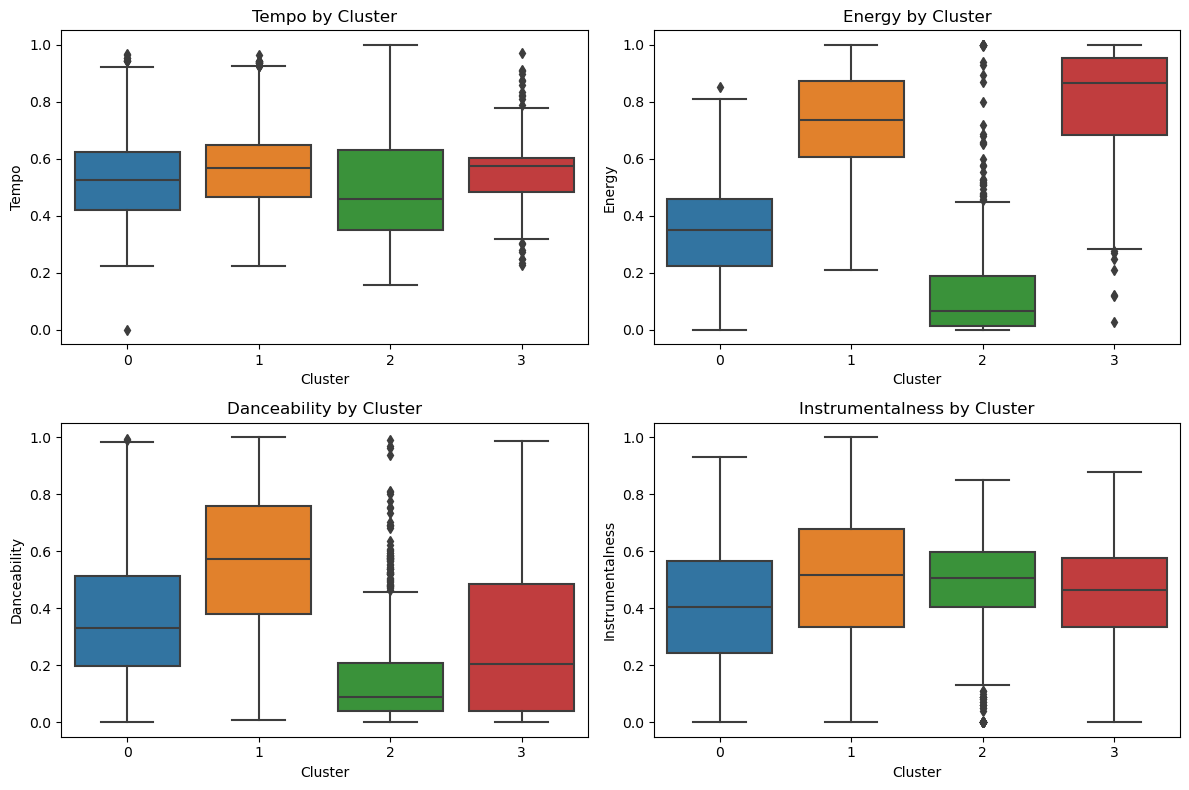

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute the feature values for each cluster
cluster_data = []
for cluster_id in range(num_clusters):
    cluster_samples = X[labels == cluster_id]
    cluster_data.append(pd.DataFrame({
        'Cluster': [cluster_id] * len(cluster_samples),
        'Tempo': cluster_samples[:, 0],
        'Energy': cluster_samples[:, 1],
        'Danceability': cluster_samples[:, 2],
        'Instrumentalness': cluster_samples[:, 3]
    }))

# Concatenate the cluster data into a single DataFrame
cluster_df = pd.concat(cluster_data, ignore_index=True)

# Visualize the cluster characteristics using box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Tempo', 'Energy', 'Danceability', 'Instrumentalness']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=cluster_df)
    plt.title(f"{feature} by Cluster")
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [88]:
# Create the popularity_score column
bins = [0, 25, 50, 75, 100]  
labels = ['Low', 'Medium', 'High', 'Highest']

df['popularity_score'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=False)


In [90]:
#Export to csv
df.to_csv('spotify_songs.csv', index=False)

In [ ]:
df.head(5)